In [2]:
list_N_atoms = [108, 256, 500, 864, 1372, 2048]
def build_nomefile(N_atoms):
    return f"../../data/pos-fcc100-random/fcc100a{N_atoms}.txt"

# Calcolo senza raggio di cutoff

In [3]:
list_potentials_no_cutoff = []

In [4]:
from libraries.CrystalStructure import CrystalStructure as Crystal
from libraries.CrystalPotential import CrystalPotential

for N_atoms in list_N_atoms:
    nomefile = build_nomefile(N_atoms)
    cristallo_no_cutoff = Crystal.from_file(nomefile)
    cristallo_no_cutoff.find_neighbours_numba() # raggio di cutoff non ancora fornito
    potenziale = CrystalPotential(cristallo_no_cutoff).compute_potential_numba()
    list_potentials_no_cutoff.append(potenziale)

    # Stampo
    print(f"N_atoms: {N_atoms}, Potential: {potenziale}, Potential/N_atoms: {potenziale/N_atoms}" )
    '''
    # Salvo in un file
    with open(f"output/potenziale.txt", "a") as f:
        f.write(f"{N_atoms} {potenziale} {potenziale/N_atoms}\n")
    '''

N_atoms: 108, Potential: -198.65611969100937, Potential/N_atoms: -1.8394085156574942
N_atoms: 256, Potential: -532.4800095250955, Potential/N_atoms: -2.0800000372074043
N_atoms: 500, Potential: -1117.0432554238384, Potential/N_atoms: -2.234086510847677
N_atoms: 864, Potential: -2022.6746505448914, Potential/N_atoms: -2.3410586233158464
N_atoms: 1372, Potential: -3319.710693385714, Potential/N_atoms: -2.41961420800708
N_atoms: 2048, Potential: -5078.491483294062, Potential/N_atoms: -2.479732169577179


Plot dei risultati

# Ripeto con raggio cutoff $R_C=4.5$

In [5]:
potenziale_cutoff_4_5 = []

In [6]:
for N_atoms in list_N_atoms:
    nomefile = build_nomefile(N_atoms)
    cristallo_cutoff_3 = Crystal.from_file(nomefile)
    cristallo_cutoff_3.set_R_C(4.5)
    cristallo_cutoff_3.find_neighbours_numba() # stalvolta raggio di cutoff = 4.5
    Potential_object = CrystalPotential(cristallo_cutoff_3)
    potenziale = Potential_object.compute_potential_numba()
    potenziale_cutoff_4_5.append(potenziale)

    # Stampo
    print(f"N_atoms: {N_atoms}, Potential: {potenziale}, Potential/N_atoms: {potenziale/N_atoms}" )
    vec_forze = Potential_object.compute_forces_numba()

N_atoms: 108, Potential: -173.13973297617312, Potential/N_atoms: -1.6031456757053066
N_atoms: 256, Potential: -453.4501806493874, Potential/N_atoms: -1.7712897681616695
N_atoms: 500, Potential: -937.8080647247081, Potential/N_atoms: -1.875616129449416
N_atoms: 864, Potential: -1681.8626860393008, Potential/N_atoms: -1.9466003310640057
N_atoms: 1372, Potential: -2741.263345429436, Potential/N_atoms: -1.9980053538115423
N_atoms: 2048, Potential: -4171.6593437320935, Potential/N_atoms: -2.0369430389316863


# Ripeto con raggio cutoff $R_C=3$ e $R_P=2.5$

In [7]:
potenziale_poly_4_2 = []

In [12]:
from libraries.PolynomialJunction import PolynomialJunction

R_C =4.5
R_P =4.2

for N_atoms in list_N_atoms:
    nomefile = build_nomefile(N_atoms)
    cristallo_poly_4_2 = Crystal.from_file(nomefile)
    cristallo_poly_4_2.set_R_C(R_C)
    cristallo_poly_4_2.set_R_P(R_P)
    cristallo_poly_4_2.find_neighbours_numba() # stalvolta raggio di cutoff = 4.5 e raggio di potenziale = 4.2 
    # gli va dato anche il potenziale polinomiale
    poly7 = PolynomialJunction(R_C=R_C, R_P=R_P)
    Potential_object = CrystalPotential(cristallo_poly_4_2, poly7=poly7)
    potenziale = Potential_object.compute_potential_numba()
    potenziale_poly_4_2.append(potenziale)

    # Stampo
    print(f"N_atoms: {N_atoms}, Potential: {potenziale}, Potential/N_atoms: {potenziale/N_atoms}" )
    vec_forze = Potential_object.compute_forces_numba()    


N_atoms: 108, Potential: -173.13973297617312, Potential/N_atoms: -1.6031456757053066

N_atoms: 256, Potential: -453.4501806493874, Potential/N_atoms: -1.7712897681616695

N_atoms: 500, Potential: -937.8080647247081, Potential/N_atoms: -1.875616129449416

N_atoms: 864, Potential: -1681.8626860393008, Potential/N_atoms: -1.9466003310640057

N_atoms: 1372, Potential: -2741.263345429436, Potential/N_atoms: -1.9980053538115423

N_atoms: 2048, Potential: -4171.6593437320935, Potential/N_atoms: -2.0369430389316863


In [9]:
cristallo_poly_4_2.print_neighbours()

Indici dei vicini per ogni atomo:
Atomo 0, n_neigh=11: [  1   2   3  16  17  18 128 129 137 192 282]
Atomo 1, n_neigh=6: [  0   2  16 128 129 283]
Atomo 2, n_neigh=9: [  0   1   3   4  18 128 192 193 326]
Atomo 3, n_neigh=12: [  0   2   4   5  18  19  20 153 160 192 193 327]
Atomo 4, n_neigh=9: [  2   3   5   6  20 160 161 193 270]
Atomo 5, n_neigh=12: [  3   4   6   7  20  21  22 160 161 169 224 271]
Atomo 6, n_neigh=9: [  4   5   7   8  22 161 224 225 362]
Atomo 7, n_neigh=12: [  5   6   8   9  22  23  24 144 185 224 225 363]
Atomo 8, n_neigh=9: [  6   7   9  10  24 144 145 225 308]
Atomo 9, n_neigh=12: [  7   8  10  11  24  25  26 144 145 176 201 309]
Atomo 10, n_neigh=9: [  8   9  11  12  26 145 176 177 368]
Atomo 11, n_neigh=12: [  9  10  12  13  26  27  28 176 177 208 217 369]
Atomo 12, n_neigh=9: [ 10  11  13  14  28 177 208 209 300]
Atomo 13, n_neigh=12: [ 11  12  14  15  28  29  30 208 209 233 240 301]
Atomo 14, n_neigh=8: [ 12  13  15  30 209 240 241 342]
Atomo 15, n_neigh=8:

In [13]:
cristallo_poly_4_2.print_second_neighbours()

Indici dei secondi vicini per ogni atomo:
Atomo 0, n_2nd_neigh=0: []
Atomo 1, n_2nd_neigh=0: []
Atomo 2, n_2nd_neigh=0: []
Atomo 3, n_2nd_neigh=0: []
Atomo 4, n_2nd_neigh=0: []
Atomo 5, n_2nd_neigh=0: []
Atomo 6, n_2nd_neigh=0: []
Atomo 7, n_2nd_neigh=0: []
Atomo 8, n_2nd_neigh=0: []
Atomo 9, n_2nd_neigh=0: []
Atomo 10, n_2nd_neigh=0: []
Atomo 11, n_2nd_neigh=0: []
Atomo 12, n_2nd_neigh=0: []
Atomo 13, n_2nd_neigh=0: []
Atomo 14, n_2nd_neigh=0: []
Atomo 15, n_2nd_neigh=0: []
Atomo 16, n_2nd_neigh=0: []
Atomo 17, n_2nd_neigh=0: []
Atomo 18, n_2nd_neigh=0: []
Atomo 19, n_2nd_neigh=0: []
Atomo 20, n_2nd_neigh=0: []
Atomo 21, n_2nd_neigh=0: []
Atomo 22, n_2nd_neigh=0: []
Atomo 23, n_2nd_neigh=0: []
Atomo 24, n_2nd_neigh=0: []
Atomo 25, n_2nd_neigh=0: []
Atomo 26, n_2nd_neigh=0: []
Atomo 27, n_2nd_neigh=0: []
Atomo 28, n_2nd_neigh=0: []
Atomo 29, n_2nd_neigh=0: []
Atomo 30, n_2nd_neigh=0: []
Atomo 31, n_2nd_neigh=0: []
Atomo 32, n_2nd_neigh=0: []
Atomo 33, n_2nd_neigh=0: []
Atomo 34, n_2nd_

## Plot

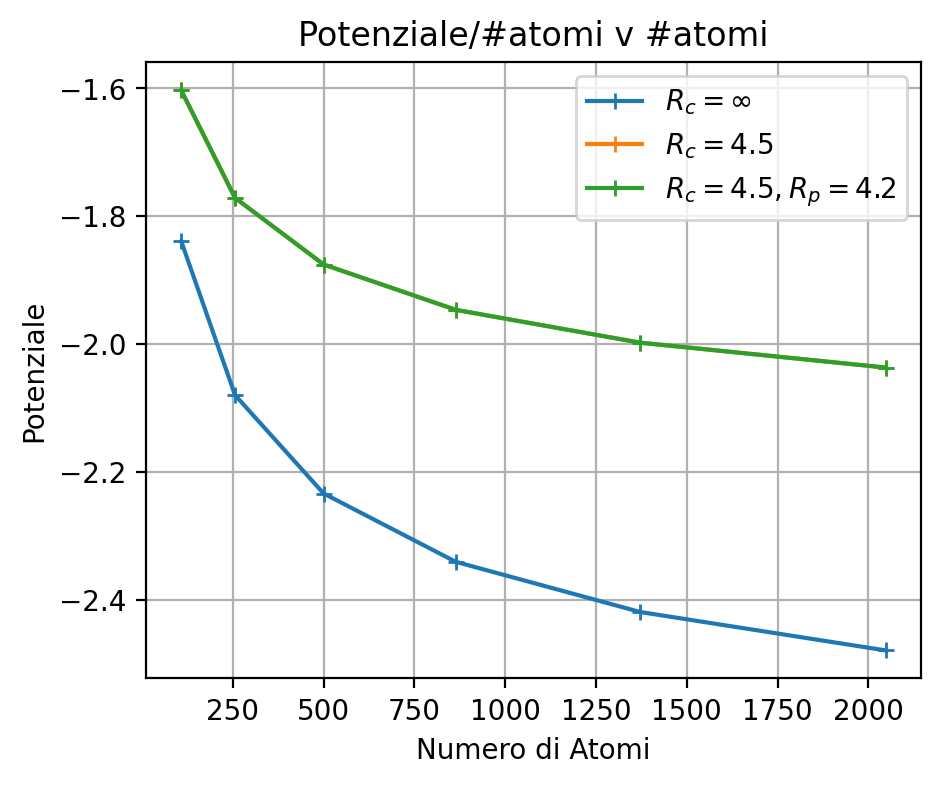

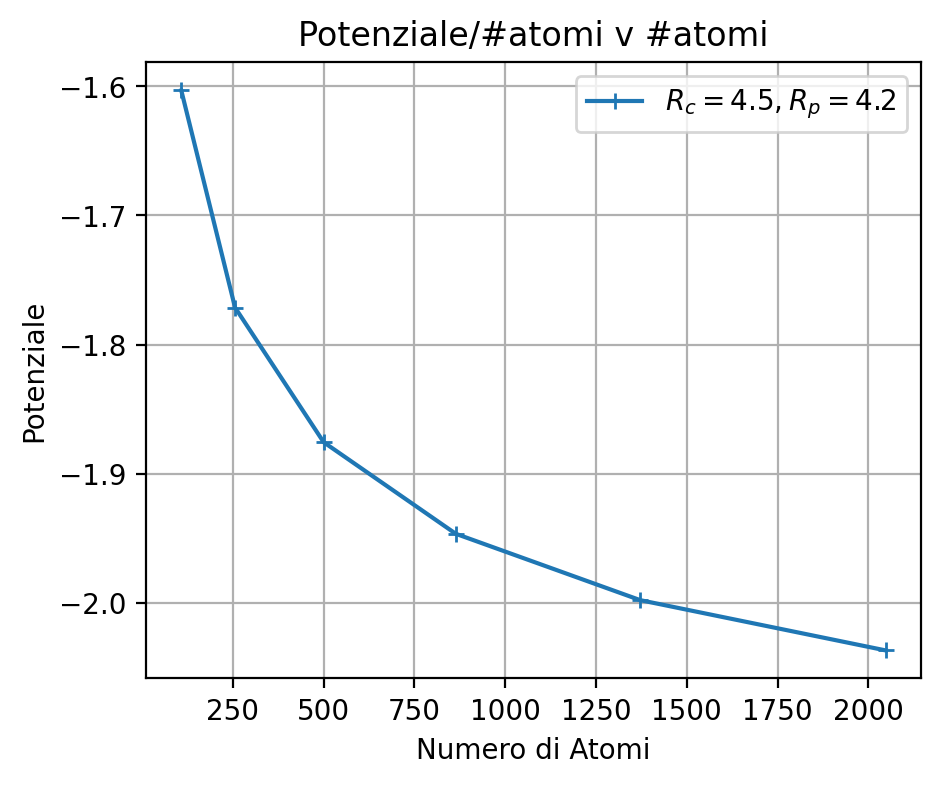

In [10]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,4), dpi=200)
plt.plot(list_N_atoms, np.array(list_potentials_no_cutoff)/np.array(list_N_atoms), marker='+', label=r"$R_c=\infty$")
plt.plot(list_N_atoms, np.array(potenziale_cutoff_4_5)/np.array(list_N_atoms), marker='+', label=r"$R_c=4.5$")
plt.plot(list_N_atoms, np.array(potenziale_poly_4_2)/np.array(list_N_atoms), marker='+', label=fr"$R_c={R_C}, R_p={R_P}$")
plt.xlabel("Numero di Atomi")
plt.ylabel("Potenziale")
plt.title("Potenziale/#atomi v #atomi")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(5,4), dpi=200)
plt.plot(list_N_atoms, np.array(potenziale_poly_4_2)/np.array(list_N_atoms), marker='+', label=fr"$R_c={R_C}, R_p={R_P}$")
plt.xlabel("Numero di Atomi")
plt.ylabel("Potenziale")
plt.title("Potenziale/#atomi v #atomi")
plt.legend()
plt.grid()
plt.show()

## Print dei vicini

In [11]:
cristallo_cutoff_3.print_neighbours()

Indici dei vicini per ogni atomo:
Atomo 0, n_neigh=11: [  1   2   3  16  17  18 128 129 137 192 282]
Atomo 1, n_neigh=6: [  0   2  16 128 129 283]
Atomo 2, n_neigh=9: [  0   1   3   4  18 128 192 193 326]
Atomo 3, n_neigh=12: [  0   2   4   5  18  19  20 153 160 192 193 327]
Atomo 4, n_neigh=9: [  2   3   5   6  20 160 161 193 270]
Atomo 5, n_neigh=12: [  3   4   6   7  20  21  22 160 161 169 224 271]
Atomo 6, n_neigh=9: [  4   5   7   8  22 161 224 225 362]
Atomo 7, n_neigh=12: [  5   6   8   9  22  23  24 144 185 224 225 363]
Atomo 8, n_neigh=9: [  6   7   9  10  24 144 145 225 308]
Atomo 9, n_neigh=12: [  7   8  10  11  24  25  26 144 145 176 201 309]
Atomo 10, n_neigh=9: [  8   9  11  12  26 145 176 177 368]
Atomo 11, n_neigh=12: [  9  10  12  13  26  27  28 176 177 208 217 369]
Atomo 12, n_neigh=9: [ 10  11  13  14  28 177 208 209 300]
Atomo 13, n_neigh=12: [ 11  12  14  15  28  29  30 208 209 233 240 301]
Atomo 14, n_neigh=8: [ 12  13  15  30 209 240 241 342]
Atomo 15, n_neigh=8: